In [7]:
import pandas as pd
# data path
path = "data/"
iris = pd.read_csv(path+"iris.csv")
iris.sample(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
52,6.9,3.1,4.9,1.5,Iris-versicolor
32,5.2,4.1,1.5,0.1,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor


In [8]:
kdata = iris.iloc[:,1:-1]
target = iris.iloc[:,-1]

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline


### Normalisation

In [10]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
scaler = MinMaxScaler()
kdata_scaled=scaler.fit_transform(kdata)

le =  LabelEncoder()
target_enc = le.fit_transform(target)

### Premiere K-means avec 150/10=15 cluster

In [16]:
kmeans = KMeans(n_clusters = 15)
kmeans.fit(kdata_scaled)

# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

### J'ulise les centroides pour chercher le nombre de k ideal pour pouvoir refaire un k-means avec ces nbre de clusters.

In [30]:
kdataindex = labels

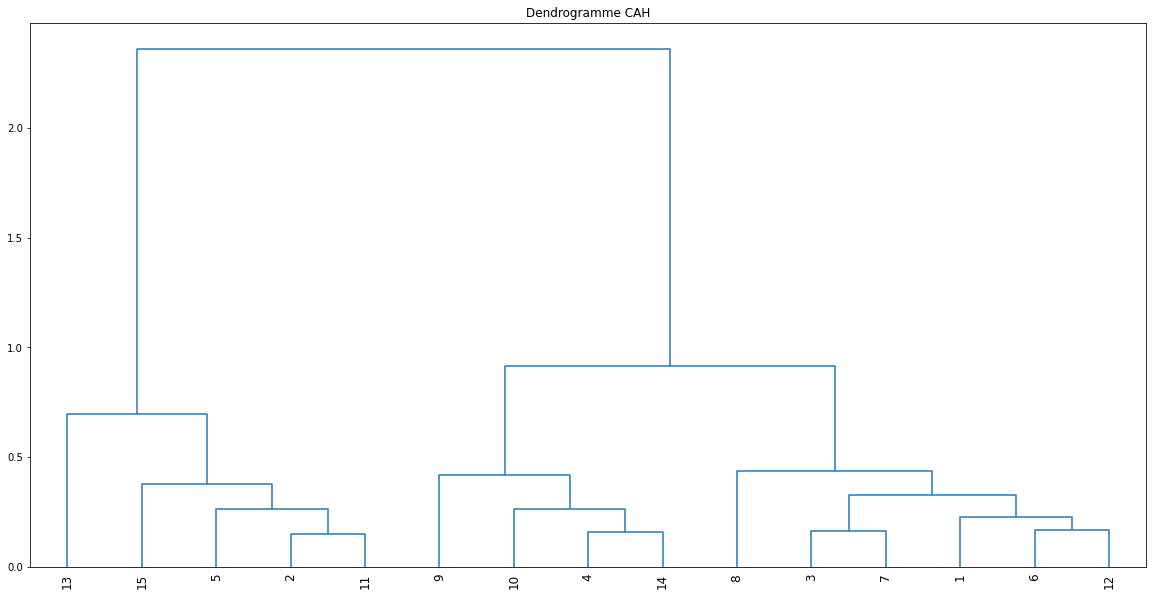

In [32]:
plt.figure(figsize=(20, 10))

# Génération de la matrice des liens
Z = linkage(centroids, method = 'ward', metric = 'euclidean')
# Affichage du dendrogramme
plt.title("Dendrogramme CAH")
dendrogram(Z, labels=kdataindex, leaf_rotation = 90., color_threshold = 0)
plt.show()


In [33]:
# Initialisation du classificateur CAH pour 3 clusters
cah_cluster = AgglomerativeClustering(n_clusters = 3)

# Apprentissage des données centroids
cah_cluster.fit(centroids)
# Calcul des labels du data set
labels = cah_cluster.labels_


In [34]:
centroids2 = []
for i in range(0,3):
    moy_cluster = np.mean(kmeans.cluster_centers_, axis=0)  
    # cluster_centers_ ndarray of shape (n_clusters, n_features)
    centroids2.append(moy_cluster)
    
centroids2 = np.array(centroids2)

### Kmeans avec initialisation des centroids sur les 3 k defini par le cah.

In [35]:
# Algorithme de K-means
kmeans2 = KMeans(n_clusters = 3,init=centroids2 )
kmeans2.fit(kdata_scaled)

# Centroids and labels
centroids2 = kmeans2.cluster_centers_
labels2 = kmeans2.labels_

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


### retour case de départ (concate preds et valeurs connues)

In [36]:
df_classes = pd.DataFrame({'Clustering classe':labels2,"Real classe":target})

ct = pd.crosstab(df_classes['Clustering classe'],df_classes['Real classe'])
print(ct) 


Real classe        Iris-setosa  Iris-versicolor  Iris-virginica
Clustering classe                                              
0                            0               50              50
1                           15                0               0
2                           35                0               0


In [37]:
iris["predit"] = labels2

In [38]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,predit
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0
